### 3 Dimensional Array Manipulations and Equalization

In [1]:
### Run below if necessary

##import sys

##sys.path.append('/usr/local/lib/python2.7/site-packages')

import math
import csv,gc
import matplotlib
import numpy as np
import cv2

#%matplotlib
BINS = 32

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from skimage import data, img_as_float
from skimage import exposure

In [4]:
a = np.random.randint(0,10,(6,7,8)) 
print a

[[[8 9 5 0 3 7 4 5]
  [1 7 8 3 4 7 1 2]
  [8 1 5 8 5 4 1 2]
  [1 1 6 8 7 7 0 4]
  [0 4 6 2 8 6 7 9]
  [7 6 8 2 8 7 8 6]
  [2 2 9 8 8 9 0 5]]

 [[2 7 6 7 8 3 5 6]
  [2 9 5 5 4 1 5 7]
  [6 9 6 8 4 4 1 7]
  [6 9 2 9 4 3 9 3]
  [3 2 9 2 2 2 4 8]
  [3 2 1 5 0 9 5 5]
  [5 2 6 9 6 5 4 7]]

 [[7 1 8 0 5 2 2 4]
  [3 8 1 0 5 8 7 2]
  [6 7 9 8 1 2 8 3]
  [0 1 7 2 8 0 9 4]
  [3 4 4 9 8 2 2 7]
  [8 5 7 1 5 7 8 7]
  [0 6 5 9 5 2 4 3]]

 [[6 7 7 8 1 0 1 4]
  [1 1 8 5 6 3 1 2]
  [7 1 4 6 0 3 2 5]
  [9 2 9 7 6 2 2 7]
  [8 4 2 3 1 0 0 4]
  [3 9 5 8 9 6 1 1]
  [4 9 0 5 0 9 8 9]]

 [[5 1 7 9 9 2 0 5]
  [4 6 1 2 2 8 1 5]
  [6 7 1 0 9 5 4 3]
  [2 9 8 9 3 4 2 8]
  [6 2 9 8 6 9 4 4]
  [7 2 9 0 7 9 0 0]
  [4 8 4 8 9 1 6 6]]

 [[7 1 9 4 4 3 5 5]
  [5 0 1 0 8 4 2 3]
  [3 8 4 3 5 7 2 8]
  [8 9 0 0 5 1 9 7]
  [0 6 5 3 9 9 1 7]
  [1 4 2 8 8 6 2 4]
  [9 1 1 7 1 6 6 0]]]


[[[8 9 5 0 3 7 4 5]
  [1 7 8 3 4 7 1 2]
  [8 1 5 8 5 4 1 2]
  [1 1 6 8 7 7 0 4]
  [0 4 6 2 8 6 7 9]
  [7 6 8 2 8 7 8 6]
  [2 2 9 8 8 9 0 5]]

 [[2 7 6 7 8 3 5 6]
  [2 9 5 5 4 1 5 7]
  [6 9 6 8 4 4 1 7]
  [6 9 2 9 4 3 9 3]
  [3 2 9 2 2 2 4 8]
  [3 2 1 5 0 9 5 5]
  [5 2 6 9 6 5 4 7]]

 [[7 1 8 0 5 2 2 4]
  [3 8 1 0 5 8 7 2]
  [6 7 9 8 1 2 8 3]
  [0 1 7 2 8 0 9 4]
  [3 4 4 9 8 2 2 7]
  [8 5 7 1 5 7 8 7]
  [0 6 5 9 5 2 4 3]]

 [[6 7 7 8 1 0 1 4]
  [1 1 8 5 6 3 1 2]
  [7 1 4 6 0 3 2 5]
  [9 2 9 7 6 2 2 7]
  [8 4 2 3 1 0 0 4]
  [3 9 5 8 9 6 1 1]
  [4 9 0 5 0 9 8 9]]

 [[5 1 7 9 9 2 0 5]
  [4 6 1 2 2 8 1 5]
  [6 7 1 0 9 5 4 3]
  [2 9 8 9 3 4 2 8]
  [6 2 9 8 6 9 4 4]
  [7 2 9 0 7 9 0 0]
  [4 8 4 8 9 1 6 6]]

 [[7 1 9 4 4 3 5 5]
  [5 0 1 0 8 4 2 3]
  [3 8 4 3 5 7 2 8]
  [8 9 0 0 5 1 9 7]
  [0 6 5 3 9 9 1 7]
  [1 4 2 8 8 6 2 4]
  [9 1 1 7 1 6 6 0]]]
 
[[8 9 5 0 3 7 4 5]
 [1 7 8 3 4 7 1 2]
 [8 1 5 8 5 4 1 2]
 [1 1 6 8 7 7 0 4]
 [0 4 6 2 8 6 7 9]
 [7 6 8 2 8 7 8 6]
 [2 2 9 8 8 9 0 5]]
[[2 7 6 7 8 

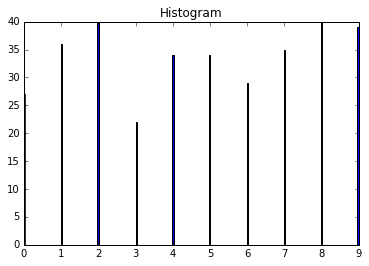

 
 
[[213]
 [208]
 [231]
 [ 12]
 [243]
 [219]
 [237]
 [231]
 [255]
 [219]
 [213]
 [243]
 [237]
 [219]
 [255]
 [249]
 [213]
 [255]
 [231]
 [213]
 [231]
 [237]
 [255]
 [249]
 [255]
 [255]
 [225]
 [213]
 [219]
 [219]
 [ 12]
 [237]
 [ 12]
 [237]
 [225]
 [249]
 [213]
 [225]
 [219]
 [208]
 [219]
 [225]
 [213]
 [249]
 [213]
 [219]
 [213]
 [225]
 [249]
 [249]
 [208]
 [213]
 [213]
 [208]
 [ 12]
 [231]
 [249]
 [219]
 [225]
 [219]
 [213]
 [243]
 [231]
 [225]
 [249]
 [208]
 [231]
 [231]
 [237]
 [255]
 [231]
 [219]
 [225]
 [208]
 [225]
 [213]
 [237]
 [237]
 [255]
 [219]
 [225]
 [208]
 [249]
 [208]
 [237]
 [243]
 [208]
 [243]
 [243]
 [249]
 [208]
 [249]
 [249]
 [249]
 [237]
 [213]
 [243]
 [249]
 [255]
 [231]
 [ 12]
 [208]
 [231]
 [231]
 [231]
 [249]
 [225]
 [208]
 [225]
 [231]
 [237]
 [219]
 [219]
 [255]
 [213]
 [ 12]
 [231]
 [249]
 [249]
 [237]
 [243]
 [213]
 [255]
 [ 12]
 [231]
 [213]
 [219]
 [249]
 [225]
 [219]
 [208]
 [213]
 [255]
 [249]
 [213]
 [243]
 [ 12]
 [255]
 [219]
 [249]
 [213]
 [ 12]
 [

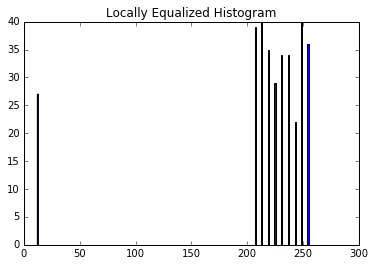

In [12]:
img = np.asarray(a)
print img

print " "

print img[0]
print img[1]

print " "

imgflat = img.reshape(-1)
print imgflat
print imgflat.sum()

print " "
fig = plt.hist(imgflat, bins=255)
plt.title('Histogram')
plt.show()

print " "

#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

img_grey = np.array(imgflat * 255, dtype = np.uint8)
#threshed = cv2.adaptiveThreshold(img_grey, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

cl1 = clahe.apply(img_grey)

 
#cv2.imwrite('clahe_2.jpg',cl1)
#cv2.startWindowThread()
#cv2.namedWindow("adaptive")
#cv2.imshow("adaptive", cl1)
#cv2.imshow("adaptive", threshed)
#plt.imshow(threshed)

print " "

localimgflat = cl1 #cl1.reshape(-1)
print localimgflat
print localimgflat.sum()

print " "
fig = plt.hist(localimgflat, bins=255)
plt.title('Locally Equalized Histogram')
plt.show()

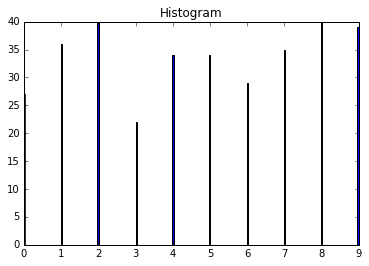

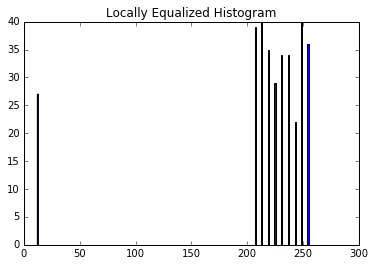

In [13]:
print " "
fig = plt.hist(imgflat, bins=255)
plt.title('Histogram')
plt.show()

print " "

fig = plt.hist(localimgflat, bins=255)
plt.title('Locally Equalized Histogram')
plt.show()

In [ ]:
!ls

In [ ]:
#!sudo yum install numpy opencv*
sudo ls
unko1234
